In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from scipy import stats
import pylab as pl
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import model_selection
seaborn.set()

C:\Users\Annisa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("wbc.csv")

In [3]:
df=df.replace('?',np.nan)
df=df.reset_index()
df['bare_nuclei'] = pd.to_numeric(df.bare_nuclei.fillna(df.bare_nuclei.median()))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
index                 699 non-null int64
clump_thickness       699 non-null int64
cell_size             699 non-null int64
cell_shape            699 non-null int64
marginal_adhesion     699 non-null int64
epitelial_cellsize    699 non-null int64
bare_nuclei           699 non-null float64
bland_chromatin       699 non-null int64
normal_nucleoli       699 non-null int64
mitoses               699 non-null int64
jenis                 699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [4]:
X = df.drop([df.columns[-1]], axis=1)
y = df.jenis

In [5]:
test_size=0.33

In [6]:
random_state=42

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [8]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [9]:
from sklearn import metrics

In [10]:
from sklearn.model_selection import GridSearchCV
from __future__ import print_function
from sklearn.metrics import classification_report

In [11]:
classifier = XGBClassifier()

In [12]:
from sklearn.cross_validation import StratifiedKFold

In [13]:
cv = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=random_state)

In [14]:
print(__doc__)

# Loading the Digits dataset
#digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(df)


# Set the parameters by cross-validation

tuned_parameters = [{'n_estimators': [50,75,100,150,200],
                     'learning_rate': [ 0.1]},]
                    
params_fixed = {
    'objective': 'binary:logistic',
    'silent': 1
}
scores = ['recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(estimator=XGBClassifier(**params_fixed, seed=random_state),
    param_grid=tuned_parameters, cv=cv, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'learning_rate': 0.1, 'n_estimators': 75}

Grid scores on development set:

0.955 (+/-0.067) for {'learning_rate': 0.1, 'n_estimators': 50}
0.956 (+/-0.067) for {'learning_rate': 0.1, 'n_estimators': 75}
0.953 (+/-0.073) for {'learning_rate': 0.1, 'n_estimators': 100}
0.953 (+/-0.073) for {'learning_rate': 0.1, 'n_estimators': 150}
0.953 (+/-0.073) for {'learning_rate': 0.1, 'n_estimators': 200}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          2       0.95      0.97      0.96       154
          4       0.95      0.90      0.92        77

avg / total       0.95      0.95      0.95       231




In [19]:
tuned_parameters1a = [{'n_estimators': [55,60,65,70,75,80,85]},]

In [20]:
print(__doc__)

n_samples = len(df)

                    
params_fixed = {
    'objective': 'binary:logistic',
    'learning_rate':0.1,
    'silent': 1
}
scores = ['recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf1a = GridSearchCV(estimator=XGBClassifier(**params_fixed, seed=random_state),
    param_grid=tuned_parameters1a, cv=cv, scoring='%s_macro' % score)
    clf1a.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf1a.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf1a.cv_results_['mean_test_score']
    stds = clf1a.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf1a.cv_results_['params']):
        print("%0.4f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred1a = y_test, clf1a.predict(X_test)
    print(classification_report(y_true, y_pred1a))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'n_estimators': 65}

Grid scores on development set:

0.9545 (+/-0.067) for {'n_estimators': 55}
0.9545 (+/-0.067) for {'n_estimators': 60}
0.9561 (+/-0.067) for {'n_estimators': 65}
0.9561 (+/-0.067) for {'n_estimators': 70}
0.9561 (+/-0.067) for {'n_estimators': 75}
0.9561 (+/-0.067) for {'n_estimators': 80}
0.9561 (+/-0.067) for {'n_estimators': 85}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          2       0.95      0.97      0.96       154
          4       0.95      0.90      0.92        77

avg / total       0.95      0.95      0.95       231




# Ternyata hasil untuk n_estimators 65-85 sama sehingga bisa dipilih 65

In [22]:
print(__doc__)

# Loading the Digits dataset
#digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(df)


# Set the parameters by cross-validation

tuned_parameters2 = [{'max_depth': range(3,14,2), 
                     'min_child_weight': range(6,14,2)},]
                    
params_fixed = {
    'objective': 'binary:logistic',
    'n_estimators': 65,
    'learning_rate': 0.1,
    'silent': 1
}
scores = ['recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf2 = GridSearchCV(estimator=XGBClassifier(**params_fixed, seed=random_state),
    param_grid=tuned_parameters2, cv=cv, scoring='%s_macro' % score)
    clf2.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf2.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf2.cv_results_['mean_test_score']
    stds = clf2.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf2.cv_results_['params']):
        print("%0.4f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred2 = y_test, clf2.predict(X_test)
    print(classification_report(y_true, y_pred2))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'max_depth': 3, 'min_child_weight': 10}

Grid scores on development set:

0.9577 (+/-0.069) for {'max_depth': 3, 'min_child_weight': 6}
0.9577 (+/-0.077) for {'max_depth': 3, 'min_child_weight': 8}
0.9622 (+/-0.074) for {'max_depth': 3, 'min_child_weight': 10}
0.9577 (+/-0.077) for {'max_depth': 3, 'min_child_weight': 12}
0.9577 (+/-0.069) for {'max_depth': 5, 'min_child_weight': 6}
0.9577 (+/-0.077) for {'max_depth': 5, 'min_child_weight': 8}
0.9622 (+/-0.074) for {'max_depth': 5, 'min_child_weight': 10}
0.9577 (+/-0.077) for {'max_depth': 5, 'min_child_weight': 12}
0.9577 (+/-0.069) for {'max_depth': 7, 'min_child_weight': 6}
0.9577 (+/-0.077) for {'max_depth': 7, 'min_child_weight': 8}
0.9622 (+/-0.074) for {'max_depth': 7, 'min_child_weight': 10}
0.9577 (+/-0.077) for {'max_depth': 7, 'min_child_weight': 12}
0.9577 (+/-0.069) for {'m

# Hasil ideal min_child_weight = 10, max_depth = 3

In [24]:
tuned_parameters2a = [{'max_depth':[2,3,4] ,
                     'min_child_weight': [9,10,11]},]

In [25]:
print(__doc__)

# Loading the Digits dataset
#digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(df)

                    
params_fixed = {
    'objective': 'binary:logistic',
    'n_estimators': 65,
    'learning_rate': 0.1,
    'silent': 1
}
scores = ['recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf2a = GridSearchCV(estimator=XGBClassifier(**params_fixed, seed=random_state),
    param_grid=tuned_parameters2a, cv=cv, scoring='%s_macro' % score)
    clf2a.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf2a.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf2a.cv_results_['mean_test_score']
    stds = clf2a.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf2a.cv_results_['params']):
        print("%0.4f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred2a = y_test, clf2a.predict(X_test)
    print(classification_report(y_true, y_pred2a))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'max_depth': 2, 'min_child_weight': 10}

Grid scores on development set:

0.9607 (+/-0.074) for {'max_depth': 2, 'min_child_weight': 9}
0.9622 (+/-0.074) for {'max_depth': 2, 'min_child_weight': 10}
0.9607 (+/-0.074) for {'max_depth': 2, 'min_child_weight': 11}
0.9607 (+/-0.074) for {'max_depth': 3, 'min_child_weight': 9}
0.9622 (+/-0.074) for {'max_depth': 3, 'min_child_weight': 10}
0.9607 (+/-0.074) for {'max_depth': 3, 'min_child_weight': 11}
0.9607 (+/-0.074) for {'max_depth': 4, 'min_child_weight': 9}
0.9622 (+/-0.074) for {'max_depth': 4, 'min_child_weight': 10}
0.9607 (+/-0.074) for {'max_depth': 4, 'min_child_weight': 11}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          2       0.

# max_depth merupakan kedalaman dari tree, meningkatkan nilai max_Depth akan membuat model lebih complex/overfit

In [28]:
tuned_parameters3 = {'gamma':[i/10.0 for i in range (0,5)]}

# gamma itu langrangian multiplier (complexity control)
higher gamma = lower difference between train/test

In [29]:
print(__doc__)

# Loading the Digits dataset
#digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(df)

                    
params_fixed = {
    'objective': 'binary:logistic',
    'n_estimators': 65,
    'learning_rate': 0.1,
    'max_depth': 2, 
    'min_child_weight': 10,
    'silent': 1
}
scores = ['recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf3 = GridSearchCV(estimator=XGBClassifier(**params_fixed, seed=random_state),
    param_grid=tuned_parameters3, cv=cv, scoring='%s_macro' % score)
    clf3.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf3.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf3.cv_results_['mean_test_score']
    stds = clf3.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf3.cv_results_['params']):
        print("%0.4f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred3 = y_test, clf3.predict(X_test)
    print(classification_report(y_true, y_pred3))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'gamma': 0.1}

Grid scores on development set:

0.9622 (+/-0.074) for {'gamma': 0.0}
0.9638 (+/-0.072) for {'gamma': 0.1}
0.9638 (+/-0.072) for {'gamma': 0.2}
0.9638 (+/-0.072) for {'gamma': 0.3}
0.9638 (+/-0.072) for {'gamma': 0.4}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          2       0.97      0.98      0.98       154
          4       0.96      0.95      0.95        77

avg / total       0.97      0.97      0.97       231




# gamma = 0.1

In [30]:
tuned_parameters4 = [{'subsample':[i/10.0 for i in range(6,10)] ,
                     'colsample_bytree':[i/10.0 for i in range(6,10)]},]

In [31]:
print(__doc__)

# Loading the Digits dataset
#digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(df)

                    
params_fixed = {
    'objective': 'binary:logistic',
    'n_estimators': 65,
    'learning_rate': 0.1,
    'max_depth': 2, 
    'min_child_weight': 10,
    'gamma':0.1,
    'silent': 1
}
scores = ['recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf4 = GridSearchCV(estimator=XGBClassifier(**params_fixed, seed=random_state),
    param_grid=tuned_parameters4, cv=cv, scoring='%s_macro' % score)
    clf4.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf4.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf4.cv_results_['mean_test_score']
    stds = clf4.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf4.cv_results_['params']):
        print("%0.4f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred4 = y_test, clf4.predict(X_test)
    print(classification_report(y_true, y_pred4))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'colsample_bytree': 0.9, 'subsample': 0.6}

Grid scores on development set:

0.9575 (+/-0.074) for {'colsample_bytree': 0.6, 'subsample': 0.6}
0.9561 (+/-0.076) for {'colsample_bytree': 0.6, 'subsample': 0.7}
0.9591 (+/-0.071) for {'colsample_bytree': 0.6, 'subsample': 0.8}
0.9622 (+/-0.069) for {'colsample_bytree': 0.6, 'subsample': 0.9}
0.9575 (+/-0.076) for {'colsample_bytree': 0.7, 'subsample': 0.6}
0.9622 (+/-0.074) for {'colsample_bytree': 0.7, 'subsample': 0.7}
0.9547 (+/-0.082) for {'colsample_bytree': 0.7, 'subsample': 0.8}
0.9622 (+/-0.069) for {'colsample_bytree': 0.7, 'subsample': 0.9}
0.9622 (+/-0.071) for {'colsample_bytree': 0.8, 'subsample': 0.6}
0.9608 (+/-0.078) for {'colsample_bytree': 0.8, 'subsample': 0.7}
0.9531 (+/-0.079) for {'colsample_bytree': 0.8, 'subsample': 0.8}
0.9577 (+/-0.079) for {'colsample_bytree': 0.8

In [32]:
tuned_parameters4a = [{'subsample':[i/100.0 for i in range(55,70,5)] ,
                     'colsample_bytree':[i/100.0 for i in range(85,100,5)]},]

In [33]:
print(__doc__)

# Loading the Digits dataset
#digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(df)

                    
params_fixed = {
    'objective': 'binary:logistic',
    'n_estimators': 65,
    'learning_rate': 0.1,
    'max_depth': 2, 
    'min_child_weight': 10,
    'gamma':0.1,
    'silent': 1
}
scores = ['recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf4a = GridSearchCV(estimator=XGBClassifier(**params_fixed, seed=random_state),
    param_grid=tuned_parameters4a, cv=cv, scoring='%s_macro' % score)
    clf4a.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf4a.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf4a.cv_results_['mean_test_score']
    stds = clf4a.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf4a.cv_results_['params']):
        print("%0.4f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred4a = y_test, clf4a.predict(X_test)
    print(classification_report(y_true, y_pred4a))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'colsample_bytree': 0.9, 'subsample': 0.6}

Grid scores on development set:

0.9592 (+/-0.075) for {'colsample_bytree': 0.85, 'subsample': 0.55}
0.9622 (+/-0.071) for {'colsample_bytree': 0.85, 'subsample': 0.6}
0.9608 (+/-0.078) for {'colsample_bytree': 0.85, 'subsample': 0.65}
0.9605 (+/-0.073) for {'colsample_bytree': 0.9, 'subsample': 0.55}
0.9638 (+/-0.072) for {'colsample_bytree': 0.9, 'subsample': 0.6}
0.9561 (+/-0.076) for {'colsample_bytree': 0.9, 'subsample': 0.65}
0.9605 (+/-0.073) for {'colsample_bytree': 0.95, 'subsample': 0.55}
0.9638 (+/-0.072) for {'colsample_bytree': 0.95, 'subsample': 0.6}
0.9561 (+/-0.076) for {'colsample_bytree': 0.95, 'subsample': 0.65}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    rec

# Hasilnya tetap sama yaitu colsample_bytee=0.9 , subsample =0.6

In [34]:
tuned_parameters5 = {'reg_alpha':[1e-5,1e-4,1e-3,1e-2,0.1,1,100]}

In [35]:
print(__doc__)

# Loading the Digits dataset
#digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(df)

                    
params_fixed = {
    'objective': 'binary:logistic',
    'n_estimators': 65,
    'learning_rate': 0.1,
    'max_depth': 2, 
    'min_child_weight': 10,
    'gamma':0.1,
    'colsample_bytree':0.9,
    'subsample':0.6,
    'silent': 1
}
scores = ['recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf5 = GridSearchCV(estimator=XGBClassifier(**params_fixed, seed=random_state),
    param_grid=tuned_parameters5, cv=cv, scoring='%s_macro' % score)
    clf5.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf5.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf5.cv_results_['mean_test_score']
    stds = clf5.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf5.cv_results_['params']):
        print("%0.4f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred5 = y_test, clf5.predict(X_test)
    print(classification_report(y_true, y_pred5))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'reg_alpha': 1e-05}

Grid scores on development set:

0.9638 (+/-0.072) for {'reg_alpha': 1e-05}
0.9638 (+/-0.072) for {'reg_alpha': 0.0001}
0.9638 (+/-0.072) for {'reg_alpha': 0.001}
0.9638 (+/-0.072) for {'reg_alpha': 0.01}
0.9622 (+/-0.069) for {'reg_alpha': 0.1}
0.9622 (+/-0.071) for {'reg_alpha': 1}
0.5000 (+/-0.000) for {'reg_alpha': 100}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          2       0.97      0.97      0.97       154
          4       0.95      0.94      0.94        77

avg / total       0.96      0.96      0.96       231




In [36]:
tuned_parameters5a = {'reg_alpha':[0.005,1e-05,0.01]}

In [37]:
print(__doc__)

# Loading the Digits dataset
#digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(df)

                    
params_fixed = {
    'objective': 'binary:logistic',
    'n_estimators': 65,
    'learning_rate': 0.1,
    'max_depth': 2, 
    'min_child_weight': 10,
    'gamma':0.1,
    'colsample_bytree':0.9,
    'subsample':0.6,
    'silent': 1
}
scores = ['recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf5a = GridSearchCV(estimator=XGBClassifier(**params_fixed, seed=random_state),
    param_grid=tuned_parameters5a, cv=cv, scoring='%s_macro' % score)
    clf5a.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf5a.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf5a.cv_results_['mean_test_score']
    stds = clf5a.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf5a.cv_results_['params']):
        print("%0.4f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred5a = y_test, clf5a.predict(X_test)
    print(classification_report(y_true, y_pred5a))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'reg_alpha': 0.005}

Grid scores on development set:

0.9638 (+/-0.072) for {'reg_alpha': 0.005}
0.9638 (+/-0.072) for {'reg_alpha': 1e-05}
0.9638 (+/-0.072) for {'reg_alpha': 0.01}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          2       0.97      0.97      0.97       154
          4       0.95      0.94      0.94        77

avg / total       0.96      0.96      0.96       231




# dengan scores recall yang sama dengan 1e-05, reg alpha yang baru yaitu 0.005

In [38]:
clf5a.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=10, missing=None, n_estimators=65, nthread=-1,
       objective='binary:logistic', reg_alpha=0.005, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.6)

In [43]:
xgb_all=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=10, missing=None, n_estimators=65, nthread=-1,
       objective='binary:logistic', reg_alpha=0.005, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.6)

In [44]:
xgb_all.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=10, missing=None, n_estimators=65, nthread=-1,
       objective='binary:logistic', reg_alpha=0.005, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.6)

In [45]:
y_pred_all = xgb_all.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_all)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_all)
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))

Akurasi: 0.9610
Precision: 0.9474
Recall: 0.9351
F1: 0.9412


# reduce learning rate

In [46]:
xgb_all2=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0.1, learning_rate=0.01, max_delta_step=0, max_depth=2,
       min_child_weight=10, missing=None, n_estimators=65, nthread=-1,
       objective='binary:logistic', reg_alpha=0.005, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.6)

In [47]:
xgb_all2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0.1, learning_rate=0.01, max_delta_step=0, max_depth=2,
       min_child_weight=10, missing=None, n_estimators=65, nthread=-1,
       objective='binary:logistic', reg_alpha=0.005, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.6)

In [48]:
y_pred_all2 = xgb_all2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_all2)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_all2)
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))

Akurasi: 0.9567
Precision: 0.9467
Recall: 0.9221
F1: 0.9342


In [49]:
xgb_all3=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0.1, learning_rate=0.15, max_delta_step=0, max_depth=2,
       min_child_weight=10, missing=None, n_estimators=65, nthread=-1,
       objective='binary:logistic', reg_alpha=0.005, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.6)
xgb_all3.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0.1, learning_rate=0.15, max_delta_step=0, max_depth=2,
       min_child_weight=10, missing=None, n_estimators=65, nthread=-1,
       objective='binary:logistic', reg_alpha=0.005, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.6)

In [51]:
y_pred_all3 = xgb_all3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_all3)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_all3)
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))

Akurasi: 0.9610
Precision: 0.9474
Recall: 0.9351
F1: 0.9412


In [52]:
import matplotlib.pyplot as plt
import xgboost as xgb

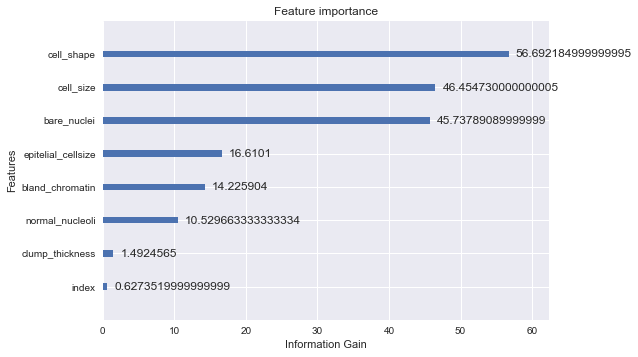

In [53]:
xgb.plot_importance(xgb_all3,importance_type='gain',xlabel='Information Gain')
plt.show()

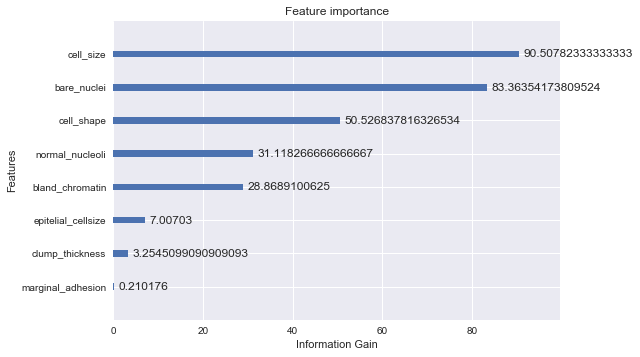

In [54]:
xgb.plot_importance(xgb_all2,importance_type='gain',xlabel='Information Gain')
plt.show()

In [57]:
print (xgb_all3.feature_importances_)

[ 0.10810811  0.10810811  0.10810811  0.16216215  0.          0.02702703
  0.27027026  0.13513513  0.08108108  0.        ]
